The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand. This dataset contains 500 of the 790 rows and part of the features analyzed by Moro et al. (2016). The remaining were omitted due to confidentiality issues. Now, we want to build a model to predict Total Interactions of customer against Facebook's page of a renowned cosmetics brand depend on serveral criteria Number of Attributes:19

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

upload dataset 

In [9]:
data=pd.read_csv('dataset_Facebook.csv',sep=';')
data.shape

(500, 19)

General information about data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

Describing the basic statistics of the data

In [11]:
data.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


check null values

In [12]:
data.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

filling the nan values with the mode

In [13]:
data.Paid = data.Paid.fillna(data.Paid.mode()[0])
data.like=data.like.fillna(data.like.mode()[0])
data.share=data.share.fillna(data.share.mode()[0])

In [14]:
data.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [15]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Converting categorical data into integer ones by using mapping function

In [16]:
data.Type.unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [17]:
data.Type=data.Type.map({'Photo':0,'Status':1,'Link':2,'Video':3})

Scatter matrix of cleaned data

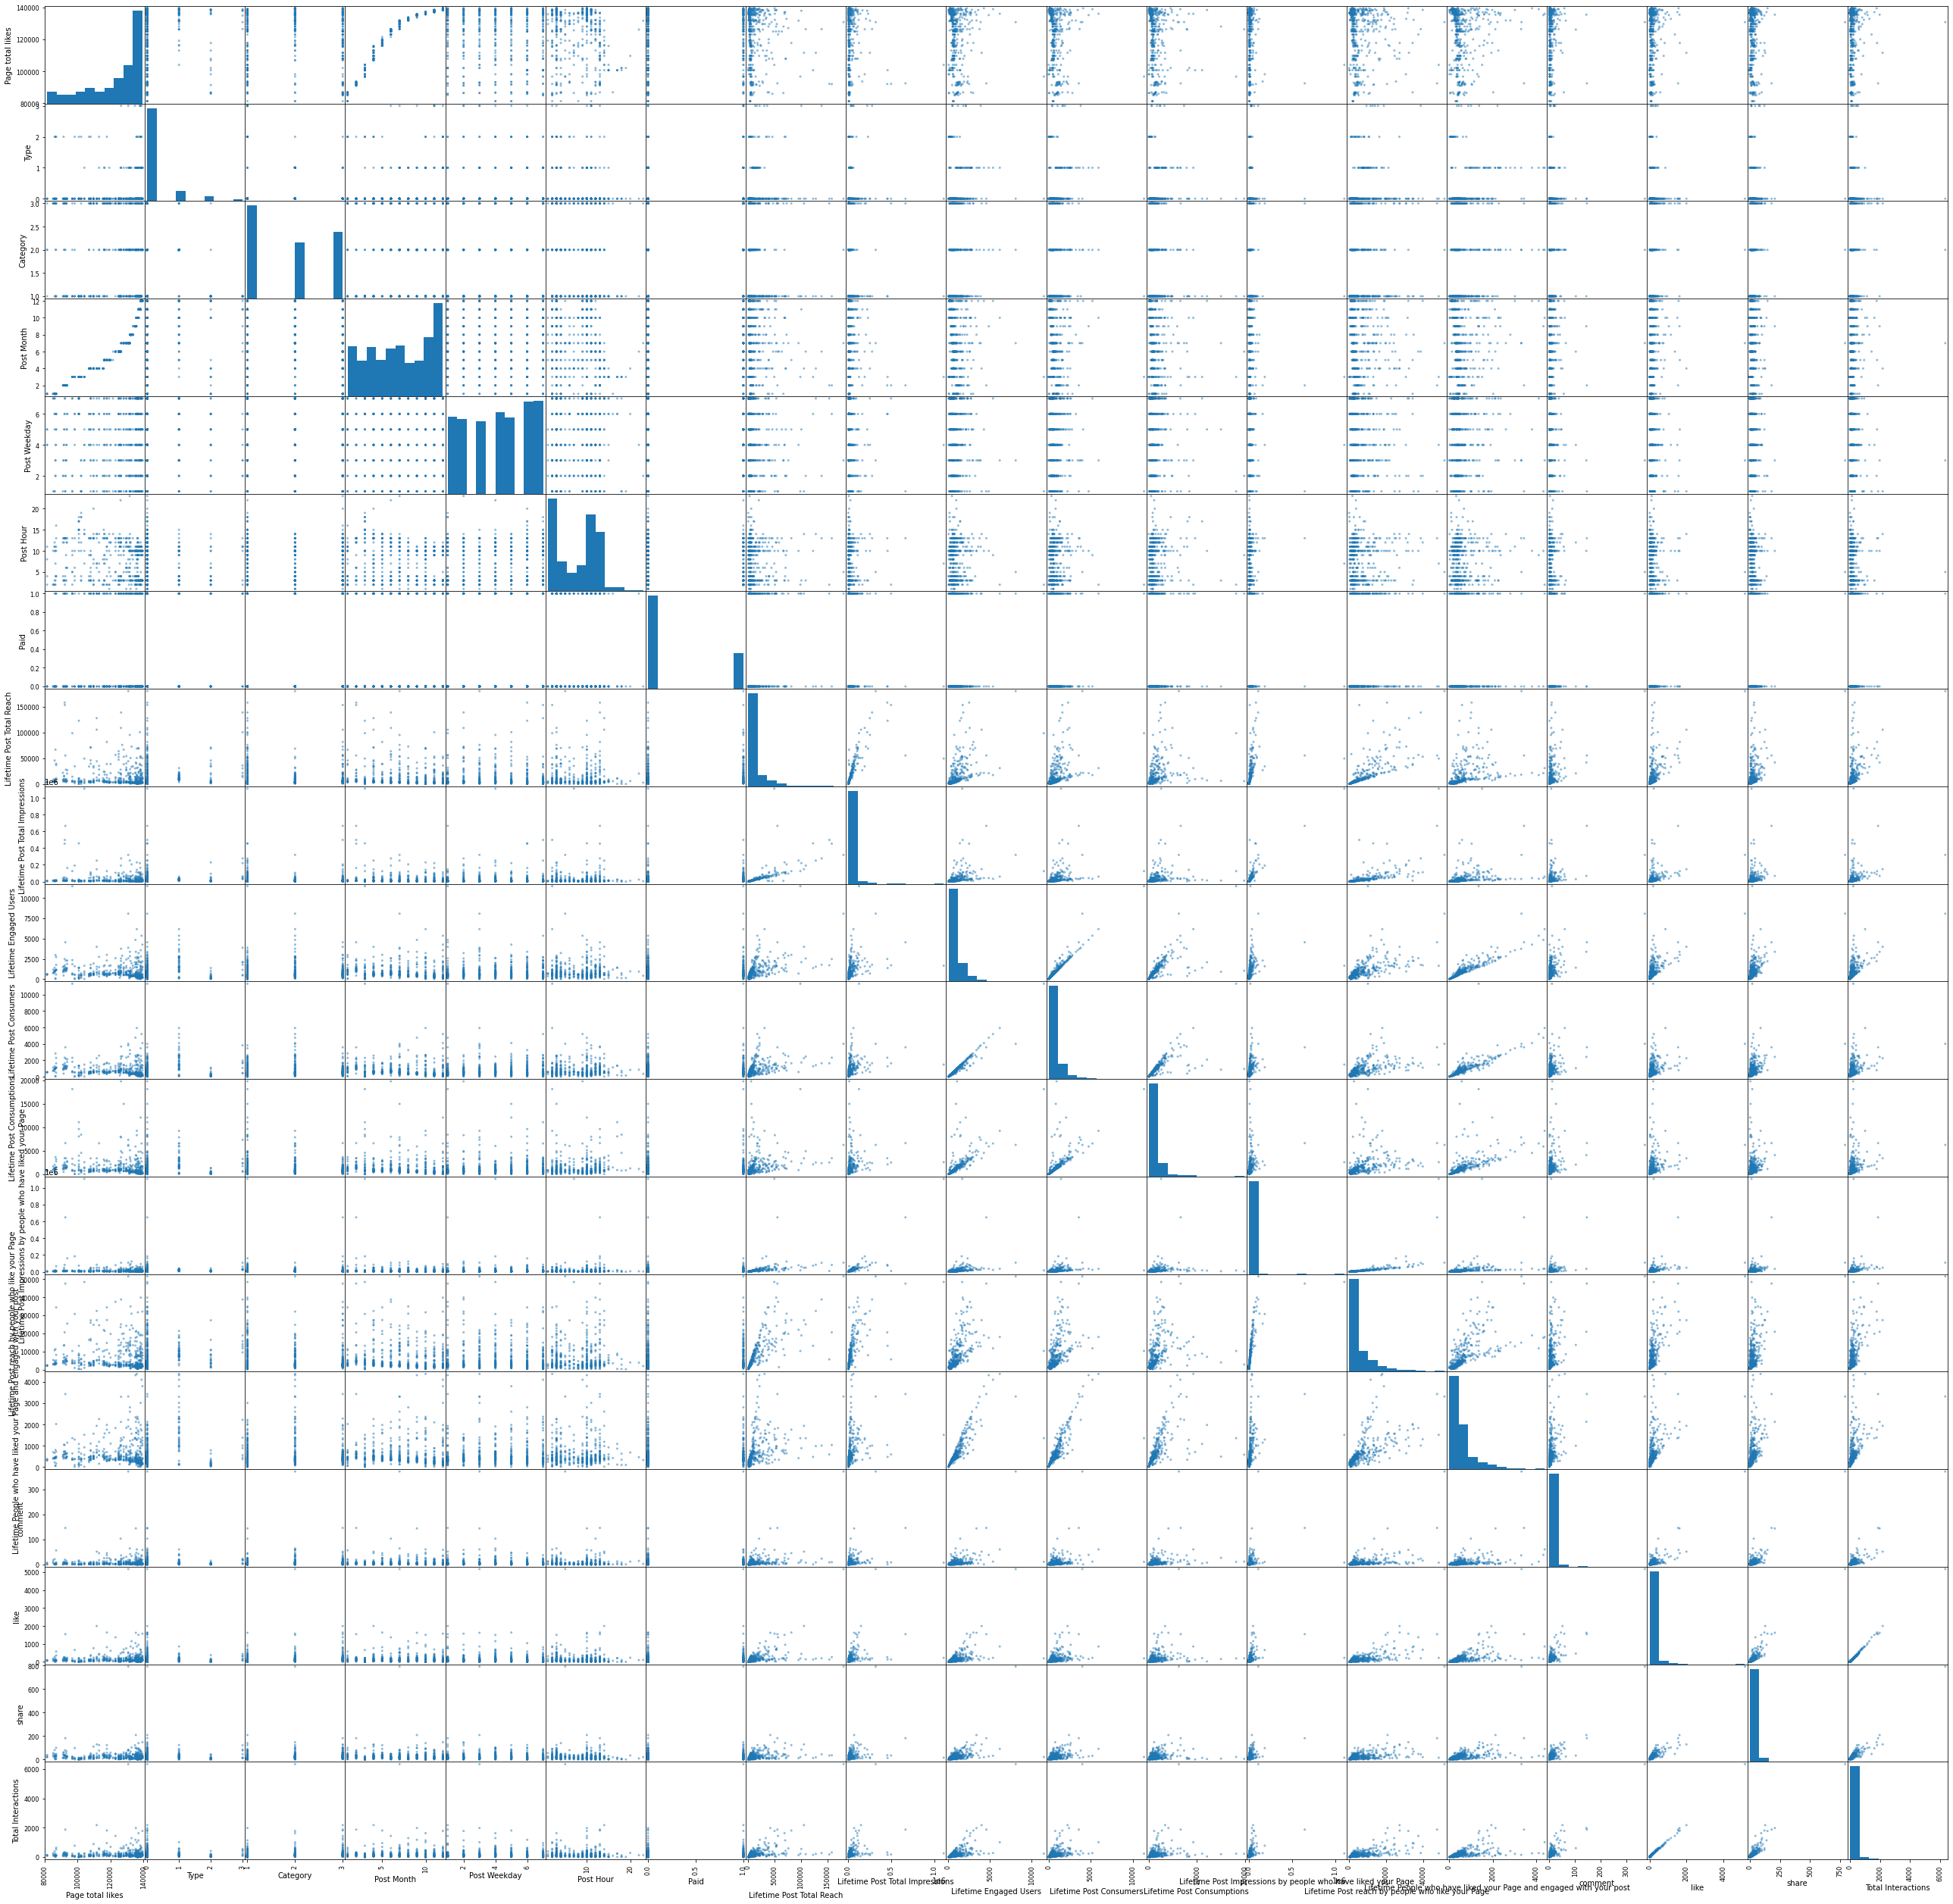

In [18]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(45, 45))

Correlation Data

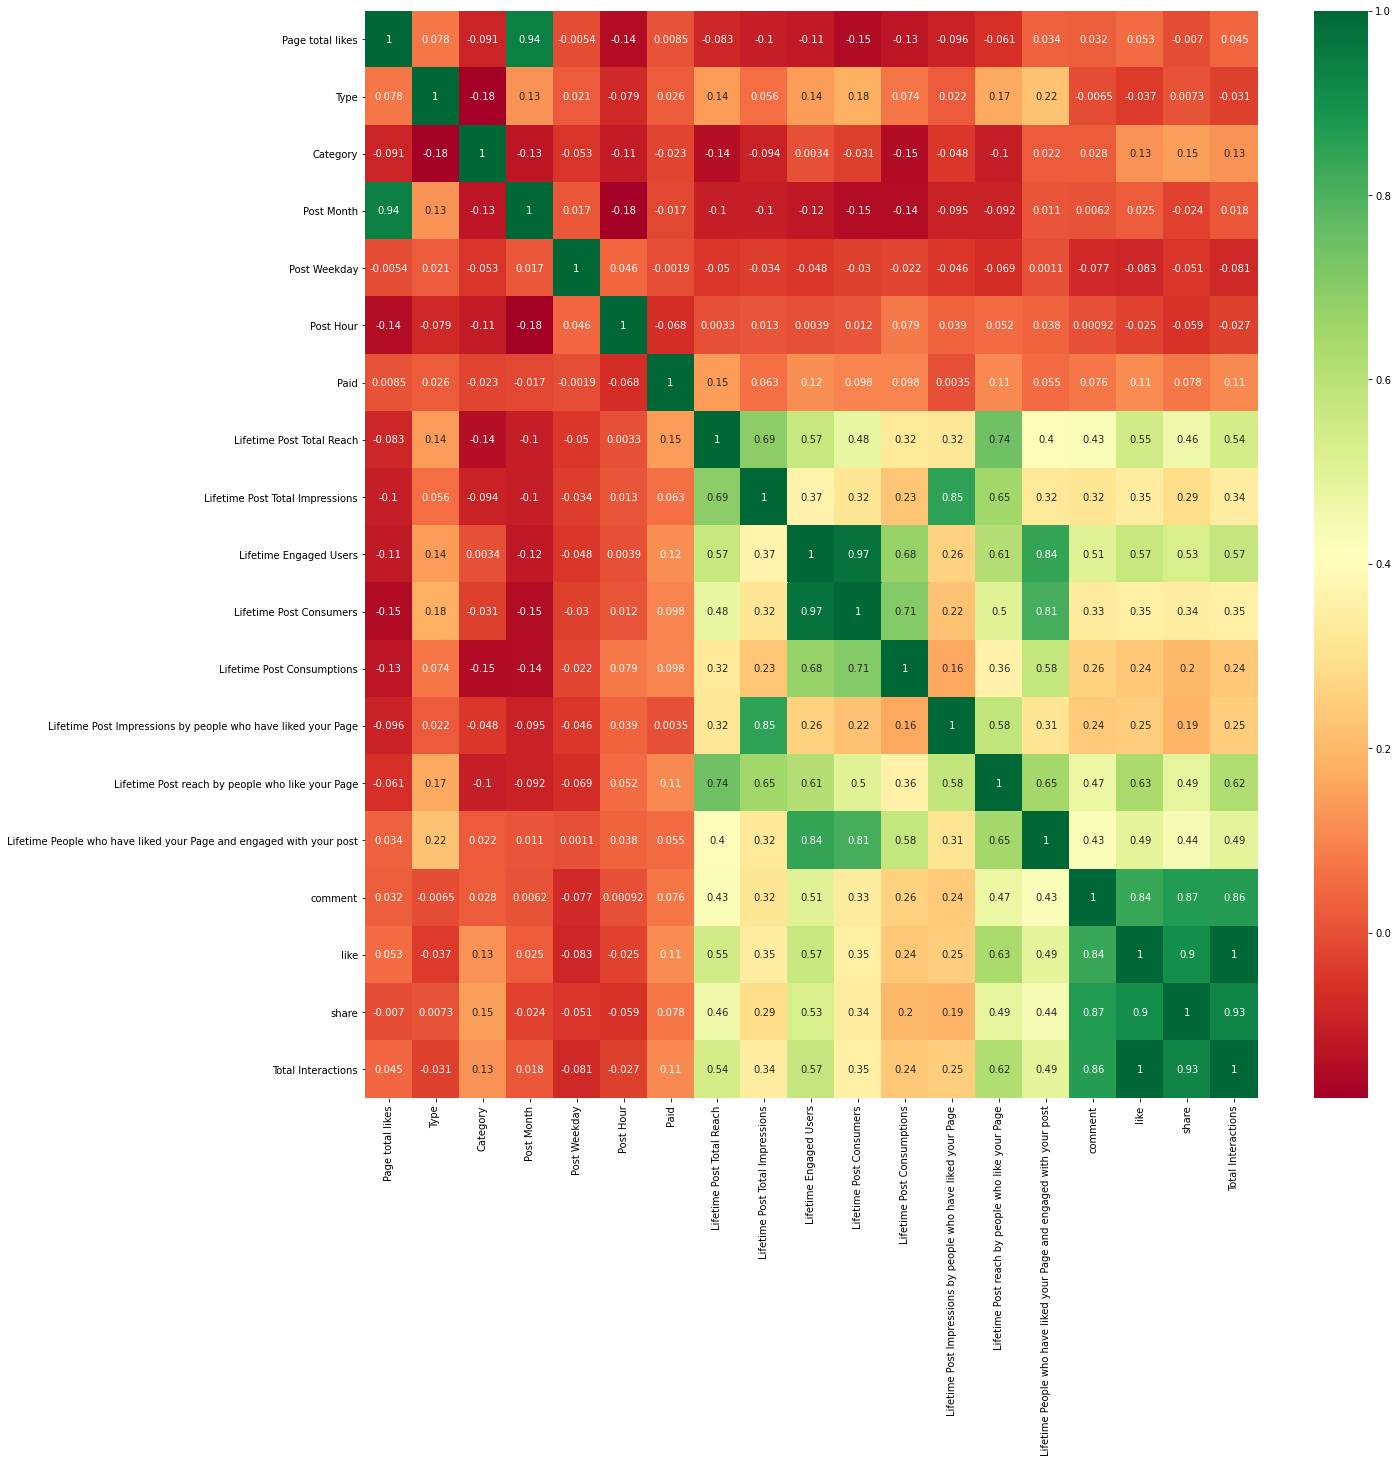

In [19]:
plt.figure(figsize=(20,20))  
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

Remove Like because dependancy of output

In [20]:
data.drop(['like'], axis=1, inplace=True)

In [21]:
X=data.iloc[:,:-1]
y=data['Total Interactions']

In [23]:
pip install sklearn


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=2831d4e6160d6f4700f9159c2999d96f8d5fb0a773972c9e8508d1126130f69f
  Stored in directory: c:\users\emad\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=10)

In [29]:
X_train,X_test=tf.cast(X_train,tf.float32),tf.cast(X_test,tf.float32)
y_train,y_test=tf.cast(y_train,tf.int64),tf.cast(y_test,tf.int64)

In [55]:
model =tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation=tf.nn.elu),
tf.keras.layers.Dense(1,activation=tf.nn.elu)])
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['MeanSquaredError'])
model.fit(X_train, y_train)

13/13 [==============================] - 0s 1ms/step - loss: 166107552.0000 - mean_squared_error: 166107552.0000


In [56]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 996us/step - loss: 309814.5625 - mean_squared_error: 309814.5625


[309814.5625, 309814.5625]

In [65]:
model1 =tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64,activation=tf.nn.elu),
tf.keras.layers.Dense(64, activation=tf.nn.relu),
tf.keras.layers.Dense(1)])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model1.compile(loss='mse',
                optimizer=optimizer,metrics=['mae', 'mse'])
model1.fit(X_train, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 31284414.0000 - mae: 2721.9050 - mse: 31284414.0000


In [66]:
EPOCHS = 1000

train = model1.fit(
  X_train,y_train,
  epochs=EPOCHS,validation_split = 0.2)

Epoch 1/1000
10/10 [==============================] - 0s 33ms/step - loss: 12809778.0000 - mae: 2346.5359 - mse: 12809778.0000 - val_loss: 8310575.0000 - val_mae: 2619.6814 - val_mse: 8310575.0000
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 3092336.7500 - mae: 1237.3005 - mse: 3092336.7500 - val_loss: 2300693.2500 - val_mae: 564.6151 - val_mse: 2300693.2500
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 23136166.0000 - mae: 2372.0303 - mse: 23136166.0000 - val_loss: 2075956.7500 - val_mae: 555.1207 - val_mse: 2075956.7500
Epoch 4/1000
10/10 [==============================] - 0s 6ms/step - loss: 2016603.0000 - mae: 778.0119 - mse: 2016603.0000 - val_loss: 3179655.7500 - val_mae: 1206.3171 - val_mse: 3179655.7500
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 8517095.0000 - mae: 2069.1003 - mse: 8517095.0000 - val_loss: 4823858.5000 - val_mae: 2104.4753 - val_mse: 4823858.5000
Epoch 6/1000
10/10 [========

10/10 [==============================] - 0s 7ms/step - loss: 310511.9375 - mae: 438.6918 - mse: 310511.9375 - val_loss: 1316791.0000 - val_mae: 1099.3990 - val_mse: 1316791.0000
Epoch 44/1000
10/10 [==============================] - 0s 5ms/step - loss: 9338794.0000 - mae: 1484.2874 - mse: 9338794.0000 - val_loss: 190702.5156 - val_mae: 218.9818 - val_mse: 190702.5156
Epoch 45/1000
10/10 [==============================] - 0s 6ms/step - loss: 386673.1875 - mae: 370.7092 - mse: 386673.1875 - val_loss: 2356642.2500 - val_mae: 1475.8508 - val_mse: 2356642.2500
Epoch 46/1000
10/10 [==============================] - 0s 5ms/step - loss: 3521322.7500 - mae: 1509.8435 - mse: 3521322.7500 - val_loss: 599317.8750 - val_mae: 666.5333 - val_mse: 599317.8750
Epoch 47/1000
10/10 [==============================] - 0s 4ms/step - loss: 6572375.0000 - mae: 1056.2971 - mse: 6572375.0000 - val_loss: 610933.8750 - val_mae: 577.9739 - val_mse: 610933.8750
Epoch 48/1000
10/10 [==============================] -

Epoch 86/1000
10/10 [==============================] - 0s 4ms/step - loss: 1122480.2500 - mae: 792.5876 - mse: 1122480.2500 - val_loss: 256691.8438 - val_mae: 260.7349 - val_mse: 256691.8438
Epoch 87/1000
10/10 [==============================] - 0s 4ms/step - loss: 3322396.7500 - mae: 757.8097 - mse: 3322396.7500 - val_loss: 418756.3125 - val_mae: 495.3111 - val_mse: 418756.3125
Epoch 88/1000
10/10 [==============================] - 0s 4ms/step - loss: 2895694.0000 - mae: 735.1487 - mse: 2895694.0000 - val_loss: 572569.2500 - val_mae: 693.6932 - val_mse: 572569.2500
Epoch 89/1000
10/10 [==============================] - 0s 4ms/step - loss: 1938995.7500 - mae: 591.7842 - mse: 1938995.7500 - val_loss: 1293676.5000 - val_mae: 856.4280 - val_mse: 1293676.5000
Epoch 90/1000
10/10 [==============================] - 0s 4ms/step - loss: 1347982.0000 - mae: 707.6583 - mse: 1347982.0000 - val_loss: 1326966.3750 - val_mae: 658.4371 - val_mse: 1326966.3750
Epoch 91/1000
10/10 [====================

Epoch 129/1000
10/10 [==============================] - 0s 5ms/step - loss: 2483281.7500 - mae: 606.6635 - mse: 2483281.7500 - val_loss: 195551.4375 - val_mae: 259.0030 - val_mse: 195551.4375
Epoch 130/1000
10/10 [==============================] - 0s 4ms/step - loss: 4155865.2500 - mae: 613.9089 - mse: 4155865.2500 - val_loss: 160675.9844 - val_mae: 200.4510 - val_mse: 160675.9844
Epoch 131/1000
10/10 [==============================] - 0s 5ms/step - loss: 490093.3438 - mae: 398.4234 - mse: 490093.3438 - val_loss: 377439.7500 - val_mae: 585.6364 - val_mse: 377439.7500
Epoch 132/1000
10/10 [==============================] - 0s 4ms/step - loss: 239132.7500 - mae: 328.2542 - mse: 239132.7500 - val_loss: 628240.6875 - val_mae: 732.8226 - val_mse: 628240.6875
Epoch 133/1000
10/10 [==============================] - 0s 4ms/step - loss: 474948.0938 - mae: 608.1721 - mse: 474948.0938 - val_loss: 298270.1562 - val_mae: 447.8942 - val_mse: 298270.1562
Epoch 134/1000
10/10 [========================

Epoch 172/1000
10/10 [==============================] - 0s 4ms/step - loss: 535706.8750 - mae: 323.3257 - mse: 535706.8750 - val_loss: 227510.6250 - val_mae: 214.9197 - val_mse: 227510.6250
Epoch 173/1000
10/10 [==============================] - 0s 5ms/step - loss: 1376686.0000 - mae: 484.9869 - mse: 1376686.0000 - val_loss: 118165.7891 - val_mae: 230.9371 - val_mse: 118165.7891
Epoch 174/1000
10/10 [==============================] - 0s 5ms/step - loss: 2900385.5000 - mae: 546.9139 - mse: 2900385.5000 - val_loss: 113807.1875 - val_mae: 165.6239 - val_mse: 113807.1875
Epoch 175/1000
10/10 [==============================] - 0s 4ms/step - loss: 126163.6875 - mae: 236.6534 - mse: 126163.6875 - val_loss: 205994.0156 - val_mae: 394.8202 - val_mse: 205994.0156
Epoch 176/1000
10/10 [==============================] - 0s 4ms/step - loss: 462759.8438 - mae: 502.2406 - mse: 462759.8438 - val_loss: 182579.4062 - val_mae: 313.0632 - val_mse: 182579.4062
Epoch 177/1000
10/10 [========================

10/10 [==============================] - 0s 3ms/step - loss: 67753.5000 - mae: 135.9825 - mse: 67753.5000 - val_loss: 71892.4844 - val_mae: 152.1361 - val_mse: 71892.4844
Epoch 216/1000
10/10 [==============================] - 0s 4ms/step - loss: 163191.4219 - mae: 307.9732 - mse: 163191.4219 - val_loss: 413149.2500 - val_mae: 584.6534 - val_mse: 413149.2500
Epoch 217/1000
10/10 [==============================] - 0s 4ms/step - loss: 1000141.3750 - mae: 509.0303 - mse: 1000141.3750 - val_loss: 106157.7656 - val_mae: 246.9080 - val_mse: 106157.7656
Epoch 218/1000
10/10 [==============================] - 0s 4ms/step - loss: 165196.4844 - mae: 254.4750 - mse: 165196.4844 - val_loss: 135111.6406 - val_mae: 270.0545 - val_mse: 135111.6406
Epoch 219/1000
10/10 [==============================] - 0s 5ms/step - loss: 920590.1875 - mae: 407.1427 - mse: 920590.1875 - val_loss: 60484.9609 - val_mae: 136.9285 - val_mse: 60484.9609
Epoch 220/1000
10/10 [==============================] - 0s 4ms/step -

10/10 [==============================] - 0s 5ms/step - loss: 139932.0938 - mae: 198.2717 - mse: 139932.0938 - val_loss: 63240.9258 - val_mae: 169.9921 - val_mse: 63240.9258
Epoch 259/1000
10/10 [==============================] - 0s 5ms/step - loss: 801606.8750 - mae: 400.7487 - mse: 801606.8750 - val_loss: 51240.1133 - val_mae: 165.5822 - val_mse: 51240.1133
Epoch 260/1000
10/10 [==============================] - 0s 4ms/step - loss: 1058069.0000 - mae: 352.2852 - mse: 1058069.0000 - val_loss: 38422.3359 - val_mae: 111.3211 - val_mse: 38422.3359
Epoch 261/1000
10/10 [==============================] - 0s 6ms/step - loss: 99315.0703 - mae: 147.0235 - mse: 99315.0703 - val_loss: 32609.5430 - val_mae: 97.9510 - val_mse: 32609.5430
Epoch 262/1000
10/10 [==============================] - 0s 6ms/step - loss: 122453.6484 - mae: 202.7099 - mse: 122453.6484 - val_loss: 124574.8750 - val_mae: 288.8789 - val_mse: 124574.8750
Epoch 263/1000
10/10 [==============================] - 0s 5ms/step - loss

10/10 [==============================] - 0s 4ms/step - loss: 331839.1875 - mae: 276.3842 - mse: 331839.1875 - val_loss: 42851.2891 - val_mae: 101.1277 - val_mse: 42851.2891
Epoch 302/1000
10/10 [==============================] - 0s 5ms/step - loss: 458613.6875 - mae: 206.1819 - mse: 458613.6875 - val_loss: 87040.4922 - val_mae: 140.9961 - val_mse: 87040.4922
Epoch 303/1000
10/10 [==============================] - 0s 5ms/step - loss: 527980.8750 - mae: 236.0240 - mse: 527980.8750 - val_loss: 77667.3516 - val_mae: 167.5911 - val_mse: 77667.3516
Epoch 304/1000
10/10 [==============================] - 0s 7ms/step - loss: 61548.8008 - mae: 172.7034 - mse: 61548.8008 - val_loss: 51602.7227 - val_mae: 117.7294 - val_mse: 51602.7227
Epoch 305/1000
10/10 [==============================] - 0s 6ms/step - loss: 538046.8750 - mae: 246.5330 - mse: 538046.8750 - val_loss: 220851.4688 - val_mae: 423.1486 - val_mse: 220851.4688
Epoch 306/1000
10/10 [==============================] - 0s 4ms/step - loss:

Epoch 345/1000
10/10 [==============================] - 0s 7ms/step - loss: 145740.2344 - mae: 218.1664 - mse: 145740.2344 - val_loss: 23235.5020 - val_mae: 91.4995 - val_mse: 23235.5020
Epoch 346/1000
10/10 [==============================] - 0s 5ms/step - loss: 804409.3750 - mae: 224.5090 - mse: 804409.3750 - val_loss: 188419.1875 - val_mae: 159.0273 - val_mse: 188419.1875
Epoch 347/1000
10/10 [==============================] - 0s 4ms/step - loss: 332124.7812 - mae: 185.6631 - mse: 332124.7812 - val_loss: 32181.2148 - val_mae: 104.5356 - val_mse: 32181.2148
Epoch 348/1000
10/10 [==============================] - 0s 4ms/step - loss: 168169.1719 - mae: 162.7467 - mse: 168169.1719 - val_loss: 49224.6211 - val_mae: 182.0304 - val_mse: 49224.6211
Epoch 349/1000
10/10 [==============================] - 0s 4ms/step - loss: 36544.4570 - mae: 120.0984 - mse: 36544.4570 - val_loss: 27743.9375 - val_mae: 92.4474 - val_mse: 27743.9375
Epoch 350/1000
10/10 [==============================] - 0s 4ms

Epoch 389/1000
10/10 [==============================] - 0s 4ms/step - loss: 176038.7812 - mae: 164.1671 - mse: 176038.7812 - val_loss: 70017.8984 - val_mae: 232.2761 - val_mse: 70017.8984
Epoch 390/1000
10/10 [==============================] - 0s 5ms/step - loss: 210594.3438 - mae: 192.5369 - mse: 210594.3438 - val_loss: 25236.4531 - val_mae: 105.5805 - val_mse: 25236.4531
Epoch 391/1000
10/10 [==============================] - 0s 4ms/step - loss: 341699.8125 - mae: 197.4684 - mse: 341699.8125 - val_loss: 12482.3652 - val_mae: 71.4849 - val_mse: 12482.3652
Epoch 392/1000
10/10 [==============================] - 0s 4ms/step - loss: 158262.7812 - mae: 142.4833 - mse: 158262.7812 - val_loss: 18911.1055 - val_mae: 83.1341 - val_mse: 18911.1055
Epoch 393/1000
10/10 [==============================] - 0s 5ms/step - loss: 21359.3594 - mae: 84.7719 - mse: 21359.3594 - val_loss: 24084.4102 - val_mae: 97.9128 - val_mse: 24084.4102
Epoch 394/1000
10/10 [==============================] - 0s 5ms/ste

Epoch 433/1000
10/10 [==============================] - 0s 3ms/step - loss: 30397.2656 - mae: 92.2335 - mse: 30397.2656 - val_loss: 31044.7500 - val_mae: 122.3437 - val_mse: 31044.7500
Epoch 434/1000
10/10 [==============================] - 0s 4ms/step - loss: 32668.8945 - mae: 119.0678 - mse: 32668.8945 - val_loss: 27956.2773 - val_mae: 91.3749 - val_mse: 27956.2773
Epoch 435/1000
10/10 [==============================] - 0s 4ms/step - loss: 51665.8984 - mae: 148.0344 - mse: 51665.8984 - val_loss: 26172.6973 - val_mae: 85.9173 - val_mse: 26172.6973
Epoch 436/1000
10/10 [==============================] - 0s 5ms/step - loss: 159241.0312 - mae: 164.7477 - mse: 159241.0312 - val_loss: 17886.0625 - val_mae: 84.4140 - val_mse: 17886.0625
Epoch 437/1000
10/10 [==============================] - 0s 5ms/step - loss: 336180.0312 - mae: 164.3063 - mse: 336180.0312 - val_loss: 30553.5938 - val_mae: 99.0086 - val_mse: 30553.5938
Epoch 438/1000
10/10 [==============================] - 0s 5ms/step - l

Epoch 477/1000
10/10 [==============================] - 0s 4ms/step - loss: 28993.2441 - mae: 129.7393 - mse: 28993.2441 - val_loss: 16988.8027 - val_mae: 77.5597 - val_mse: 16988.8027
Epoch 478/1000
10/10 [==============================] - 0s 4ms/step - loss: 196080.8750 - mae: 189.4224 - mse: 196080.8750 - val_loss: 22675.9062 - val_mae: 109.6924 - val_mse: 22675.9062
Epoch 479/1000
10/10 [==============================] - 0s 5ms/step - loss: 256693.0781 - mae: 143.5403 - mse: 256693.0781 - val_loss: 23896.3789 - val_mae: 87.0471 - val_mse: 23896.3789
Epoch 480/1000
10/10 [==============================] - 0s 5ms/step - loss: 28089.0742 - mae: 86.2530 - mse: 28089.0742 - val_loss: 42570.8438 - val_mae: 184.7231 - val_mse: 42570.8438
Epoch 481/1000
10/10 [==============================] - 0s 5ms/step - loss: 45256.3867 - mae: 121.5613 - mse: 45256.3867 - val_loss: 19114.6621 - val_mae: 89.1420 - val_mse: 19114.6621
Epoch 482/1000
10/10 [==============================] - 0s 4ms/step - 

Epoch 521/1000
10/10 [==============================] - 0s 4ms/step - loss: 44957.7109 - mae: 106.9596 - mse: 44957.7109 - val_loss: 43478.0078 - val_mae: 110.1185 - val_mse: 43478.0078
Epoch 522/1000
10/10 [==============================] - 0s 5ms/step - loss: 23241.0801 - mae: 94.2111 - mse: 23241.0801 - val_loss: 98442.5547 - val_mae: 227.7731 - val_mse: 98442.5547
Epoch 523/1000
10/10 [==============================] - 0s 4ms/step - loss: 132204.5625 - mae: 170.5719 - mse: 132204.5625 - val_loss: 152194.5469 - val_mae: 292.5490 - val_mse: 152194.5469
Epoch 524/1000
10/10 [==============================] - 0s 5ms/step - loss: 310036.2500 - mae: 178.4393 - mse: 310036.2500 - val_loss: 19056.4746 - val_mae: 86.2750 - val_mse: 19056.4746
Epoch 525/1000
10/10 [==============================] - 0s 5ms/step - loss: 60271.0117 - mae: 102.3222 - mse: 60271.0117 - val_loss: 24824.1211 - val_mae: 83.3484 - val_mse: 24824.1211
Epoch 526/1000
10/10 [==============================] - 0s 5ms/step

10/10 [==============================] - 0s 6ms/step - loss: 283651.5625 - mae: 155.8939 - mse: 283651.5625 - val_loss: 27846.3691 - val_mae: 87.2145 - val_mse: 27846.3691
Epoch 566/1000
10/10 [==============================] - 0s 4ms/step - loss: 23244.2988 - mae: 82.8204 - mse: 23244.2988 - val_loss: 38126.2305 - val_mae: 170.6237 - val_mse: 38126.2305
Epoch 567/1000
10/10 [==============================] - 0s 4ms/step - loss: 123662.3984 - mae: 147.7206 - mse: 123662.3984 - val_loss: 43451.6836 - val_mae: 97.4989 - val_mse: 43451.6836
Epoch 568/1000
10/10 [==============================] - 0s 4ms/step - loss: 20117.2520 - mae: 92.8696 - mse: 20117.2520 - val_loss: 37804.5547 - val_mae: 145.1872 - val_mse: 37804.5547
Epoch 569/1000
10/10 [==============================] - 0s 4ms/step - loss: 28626.5508 - mae: 101.0834 - mse: 28626.5508 - val_loss: 41222.6914 - val_mae: 92.6231 - val_mse: 41222.6914
Epoch 570/1000
10/10 [==============================] - 0s 4ms/step - loss: 145639.156

10/10 [==============================] - 0s 4ms/step - loss: 44444.6133 - mae: 113.1706 - mse: 44444.6133 - val_loss: 40847.2266 - val_mae: 128.3545 - val_mse: 40847.2266
Epoch 610/1000
10/10 [==============================] - 0s 4ms/step - loss: 51085.1289 - mae: 111.0921 - mse: 51085.1289 - val_loss: 53339.2812 - val_mae: 139.7256 - val_mse: 53339.2812
Epoch 611/1000
10/10 [==============================] - 0s 6ms/step - loss: 16274.0000 - mae: 83.5026 - mse: 16274.0000 - val_loss: 36116.4336 - val_mae: 91.8907 - val_mse: 36116.4336
Epoch 612/1000
10/10 [==============================] - 0s 5ms/step - loss: 47595.3984 - mae: 133.4869 - mse: 47595.3984 - val_loss: 47072.1367 - val_mae: 100.5099 - val_mse: 47072.1367
Epoch 613/1000
10/10 [==============================] - 0s 4ms/step - loss: 38719.1016 - mae: 115.4840 - mse: 38719.1016 - val_loss: 44883.9102 - val_mae: 101.3917 - val_mse: 44883.9102
Epoch 614/1000
10/10 [==============================] - 0s 4ms/step - loss: 116543.0625

10/10 [==============================] - 0s 11ms/step - loss: 174758.7656 - mae: 125.3898 - mse: 174758.7656 - val_loss: 38460.4062 - val_mae: 88.5987 - val_mse: 38460.4062
Epoch 654/1000
10/10 [==============================] - 0s 12ms/step - loss: 14803.6250 - mae: 76.2840 - mse: 14803.6250 - val_loss: 43408.8359 - val_mae: 104.0410 - val_mse: 43408.8359
Epoch 655/1000
10/10 [==============================] - 0s 6ms/step - loss: 47352.5742 - mae: 119.4606 - mse: 47352.5742 - val_loss: 41392.8984 - val_mae: 94.2266 - val_mse: 41392.8984
Epoch 656/1000
10/10 [==============================] - 0s 8ms/step - loss: 59619.8555 - mae: 103.0697 - mse: 59619.8555 - val_loss: 50481.3008 - val_mae: 99.8010 - val_mse: 50481.3008
Epoch 657/1000
10/10 [==============================] - 0s 7ms/step - loss: 9778.1533 - mae: 66.1075 - mse: 9778.1533 - val_loss: 35383.0820 - val_mae: 87.2117 - val_mse: 35383.0820
Epoch 658/1000
10/10 [==============================] - 0s 6ms/step - loss: 65312.9766 - 

10/10 [==============================] - 0s 6ms/step - loss: 87902.5547 - mae: 117.9800 - mse: 87902.5547 - val_loss: 41015.6484 - val_mae: 91.8689 - val_mse: 41015.6484
Epoch 698/1000
10/10 [==============================] - 0s 6ms/step - loss: 11921.8447 - mae: 70.0883 - mse: 11921.8447 - val_loss: 51391.5078 - val_mae: 93.9884 - val_mse: 51391.5078
Epoch 699/1000
10/10 [==============================] - 0s 5ms/step - loss: 57533.0312 - mae: 140.8636 - mse: 57533.0312 - val_loss: 52775.8203 - val_mae: 104.7299 - val_mse: 52775.8203
Epoch 700/1000
10/10 [==============================] - 0s 7ms/step - loss: 24800.0586 - mae: 87.2730 - mse: 24800.0586 - val_loss: 47951.2617 - val_mae: 108.5678 - val_mse: 47951.2617
Epoch 701/1000
10/10 [==============================] - 0s 8ms/step - loss: 30827.1367 - mae: 102.8693 - mse: 30827.1367 - val_loss: 39722.2734 - val_mae: 137.5670 - val_mse: 39722.2734
Epoch 702/1000
10/10 [==============================] - 0s 5ms/step - loss: 50372.6680 - 

10/10 [==============================] - 0s 4ms/step - loss: 57296.4062 - mae: 117.4269 - mse: 57296.4062 - val_loss: 30205.3438 - val_mae: 101.8535 - val_mse: 30205.3438
Epoch 742/1000
10/10 [==============================] - 0s 4ms/step - loss: 66823.7031 - mae: 95.3783 - mse: 66823.7031 - val_loss: 37827.4141 - val_mae: 87.7333 - val_mse: 37827.4141
Epoch 743/1000
10/10 [==============================] - 0s 5ms/step - loss: 27706.3711 - mae: 86.0476 - mse: 27706.3711 - val_loss: 40207.5820 - val_mae: 93.3765 - val_mse: 40207.5820
Epoch 744/1000
10/10 [==============================] - 0s 4ms/step - loss: 51427.3086 - mae: 89.5074 - mse: 51427.3086 - val_loss: 65836.3594 - val_mae: 116.9951 - val_mse: 65836.3594
Epoch 745/1000
10/10 [==============================] - 0s 5ms/step - loss: 52507.8633 - mae: 105.4350 - mse: 52507.8633 - val_loss: 47605.4844 - val_mae: 142.8634 - val_mse: 47605.4844
Epoch 746/1000
10/10 [==============================] - 0s 5ms/step - loss: 16893.6211 - m

10/10 [==============================] - 0s 4ms/step - loss: 47475.8320 - mae: 90.0568 - mse: 47475.8320 - val_loss: 33679.4922 - val_mae: 102.3262 - val_mse: 33679.4922
Epoch 786/1000
10/10 [==============================] - 0s 6ms/step - loss: 49807.1719 - mae: 87.8488 - mse: 49807.1719 - val_loss: 31024.4746 - val_mae: 88.7318 - val_mse: 31024.4746
Epoch 787/1000
10/10 [==============================] - 0s 4ms/step - loss: 29382.6504 - mae: 89.2908 - mse: 29382.6504 - val_loss: 45809.6758 - val_mae: 96.9839 - val_mse: 45809.6758
Epoch 788/1000
10/10 [==============================] - 0s 5ms/step - loss: 24377.0977 - mae: 75.5366 - mse: 24377.0977 - val_loss: 40435.6289 - val_mae: 109.9237 - val_mse: 40435.6289
Epoch 789/1000
10/10 [==============================] - 0s 5ms/step - loss: 16785.0801 - mae: 69.9073 - mse: 16785.0801 - val_loss: 51520.1719 - val_mae: 111.6317 - val_mse: 51520.1719
Epoch 790/1000
10/10 [==============================] - 0s 4ms/step - loss: 27092.2129 - mae

10/10 [==============================] - 0s 5ms/step - loss: 45853.4375 - mae: 86.5063 - mse: 45853.4375 - val_loss: 29685.6094 - val_mae: 121.5622 - val_mse: 29685.6094
Epoch 830/1000
10/10 [==============================] - 0s 5ms/step - loss: 18601.3008 - mae: 85.8080 - mse: 18601.3008 - val_loss: 43628.8047 - val_mae: 99.1375 - val_mse: 43628.8047
Epoch 831/1000
10/10 [==============================] - 0s 5ms/step - loss: 21622.5312 - mae: 77.3209 - mse: 21622.5312 - val_loss: 43323.2930 - val_mae: 99.0987 - val_mse: 43323.2930
Epoch 832/1000
10/10 [==============================] - 0s 5ms/step - loss: 47017.2422 - mae: 85.1069 - mse: 47017.2422 - val_loss: 40479.1445 - val_mae: 96.4117 - val_mse: 40479.1445
Epoch 833/1000
10/10 [==============================] - 0s 5ms/step - loss: 48036.4609 - mae: 74.1954 - mse: 48036.4609 - val_loss: 42356.7422 - val_mae: 95.8114 - val_mse: 42356.7422
Epoch 834/1000
10/10 [==============================] - 0s 5ms/step - loss: 20716.8203 - mae: 

10/10 [==============================] - 0s 4ms/step - loss: 10290.2461 - mae: 66.3993 - mse: 10290.2461 - val_loss: 37453.9492 - val_mae: 98.9058 - val_mse: 37453.9492
Epoch 874/1000
10/10 [==============================] - 0s 4ms/step - loss: 16739.5059 - mae: 88.0138 - mse: 16739.5059 - val_loss: 44541.1250 - val_mae: 103.9477 - val_mse: 44541.1250
Epoch 875/1000
10/10 [==============================] - 0s 4ms/step - loss: 31309.1875 - mae: 74.5902 - mse: 31309.1875 - val_loss: 42802.8047 - val_mae: 105.4047 - val_mse: 42802.8047
Epoch 876/1000
10/10 [==============================] - 0s 3ms/step - loss: 32468.4746 - mae: 88.7772 - mse: 32468.4746 - val_loss: 52515.8750 - val_mae: 110.6984 - val_mse: 52515.8750
Epoch 877/1000
10/10 [==============================] - 0s 6ms/step - loss: 22488.7051 - mae: 73.4506 - mse: 22488.7051 - val_loss: 42637.6562 - val_mae: 100.1931 - val_mse: 42637.6562
Epoch 878/1000
10/10 [==============================] - 0s 4ms/step - loss: 12288.6270 - ma

10/10 [==============================] - 0s 5ms/step - loss: 14048.1221 - mae: 69.4470 - mse: 14048.1221 - val_loss: 38298.9766 - val_mae: 97.6189 - val_mse: 38298.9766
Epoch 918/1000
10/10 [==============================] - 0s 4ms/step - loss: 13329.6113 - mae: 69.3744 - mse: 13329.6113 - val_loss: 52397.5391 - val_mae: 152.7730 - val_mse: 52397.5391
Epoch 919/1000
10/10 [==============================] - 0s 4ms/step - loss: 27966.5059 - mae: 89.9631 - mse: 27966.5059 - val_loss: 44477.8672 - val_mae: 108.3444 - val_mse: 44477.8672
Epoch 920/1000
10/10 [==============================] - 0s 5ms/step - loss: 14708.4814 - mae: 61.5567 - mse: 14708.4814 - val_loss: 45680.6367 - val_mae: 94.7836 - val_mse: 45680.6367
Epoch 921/1000
10/10 [==============================] - 0s 4ms/step - loss: 7068.1782 - mae: 60.5881 - mse: 7068.1782 - val_loss: 45490.0156 - val_mae: 98.7760 - val_mse: 45490.0156
Epoch 922/1000
10/10 [==============================] - 0s 4ms/step - loss: 4701.6318 - mae: 49

10/10 [==============================] - 0s 4ms/step - loss: 19736.3145 - mae: 61.2625 - mse: 19736.3145 - val_loss: 85477.8672 - val_mae: 229.8432 - val_mse: 85477.8672
Epoch 962/1000
10/10 [==============================] - 0s 4ms/step - loss: 16951.0352 - mae: 77.4918 - mse: 16951.0352 - val_loss: 30819.9531 - val_mae: 95.7459 - val_mse: 30819.9531
Epoch 963/1000
10/10 [==============================] - 0s 5ms/step - loss: 13401.2656 - mae: 68.3445 - mse: 13401.2656 - val_loss: 41396.5273 - val_mae: 98.1875 - val_mse: 41396.5273
Epoch 964/1000
10/10 [==============================] - 0s 5ms/step - loss: 10939.8604 - mae: 59.0158 - mse: 10939.8604 - val_loss: 42722.7656 - val_mae: 100.6720 - val_mse: 42722.7656
Epoch 965/1000
10/10 [==============================] - 0s 7ms/step - loss: 14552.3047 - mae: 73.6907 - mse: 14552.3047 - val_loss: 42861.9570 - val_mae: 95.0626 - val_mse: 42861.9570
Epoch 966/1000
10/10 [==============================] - 0s 9ms/step - loss: 9046.4385 - mae: 

In [67]:
hist = pd.DataFrame(train.history)
hist['epoch'] = train.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,17822.537109,78.642563,17822.537109,41976.851562,101.310005,41976.851562,995
996,11596.408203,68.004379,11596.408203,27850.878906,94.246765,27850.878906,996
997,13758.501953,60.722626,13758.501953,34837.832031,90.626289,34837.832031,997
998,9679.259766,66.189270,9679.259766,28915.347656,87.544563,28915.347656,998
999,10648.116211,63.062824,10648.116211,39750.984375,126.842201,39750.984375,999
